In [1]:
%matplotlib inline
 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/processed_data.csv')
data_without_old = pd.read_csv('./data/data_2000_2020.csv')

In [3]:
oldest_year = data['year'].min()
print(oldest_year)

1921


In [4]:
data.drop("Unnamed: 0", axis=1, inplace=True)
print(data.shape)
data.head(2)

(169909, 15)


,acousticness,danceability,energy,valence,instrumentalness,loudness,tempo,popularity,key,mode,duration_ms,speechiness,liveness,explicit,year
0,0.995,0.708,0.195,0.779,0.563,-12.428,118.469,0,10,1,158648,0.051,0.151,0,1928
1,0.994,0.379,0.013,0.077,0.901,-28.454,83.972,0,8,1,282133,0.046,0.076,0,1928


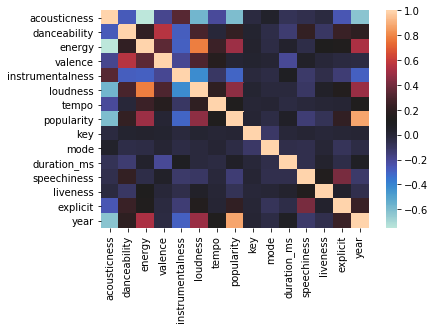

In [5]:
sns.heatmap(data.corr(), cmap='icefire');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


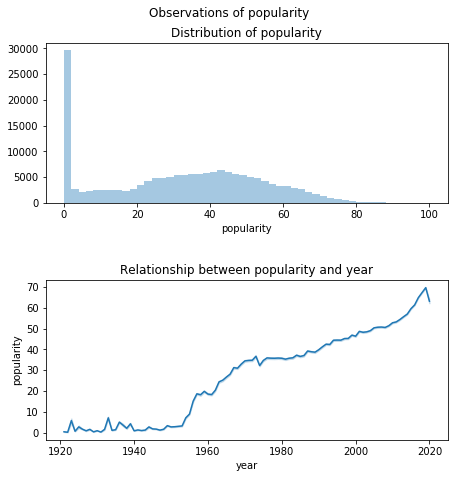

In [6]:
# Set the target variable
y = data.popularity
 
fig,axs = plt.subplots(2,1, figsize=(7,7))
fig.suptitle('Observations of popularity')
 
# Observe the distribution of 'popularity'axs[0].set_title('Distribution of popularity')
axs[0].set_title('Distribution of popularity')
sns.distplot(data['popularity'], ax=axs[0], kde=False)
 
axs[1].set_title('Relationship between popularity and year')
sns.lineplot(x='year', y='popularity', data=data, ax=axs[1])
 
fig.tight_layout(pad=3.0)

In [7]:
features = ['valence', 'acousticness', 'danceability',
            'duration_ms', 'energy', 'explicit', 'year', 'instrumentalness', 'key',
            'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

X = data[features]
y = data.popularity

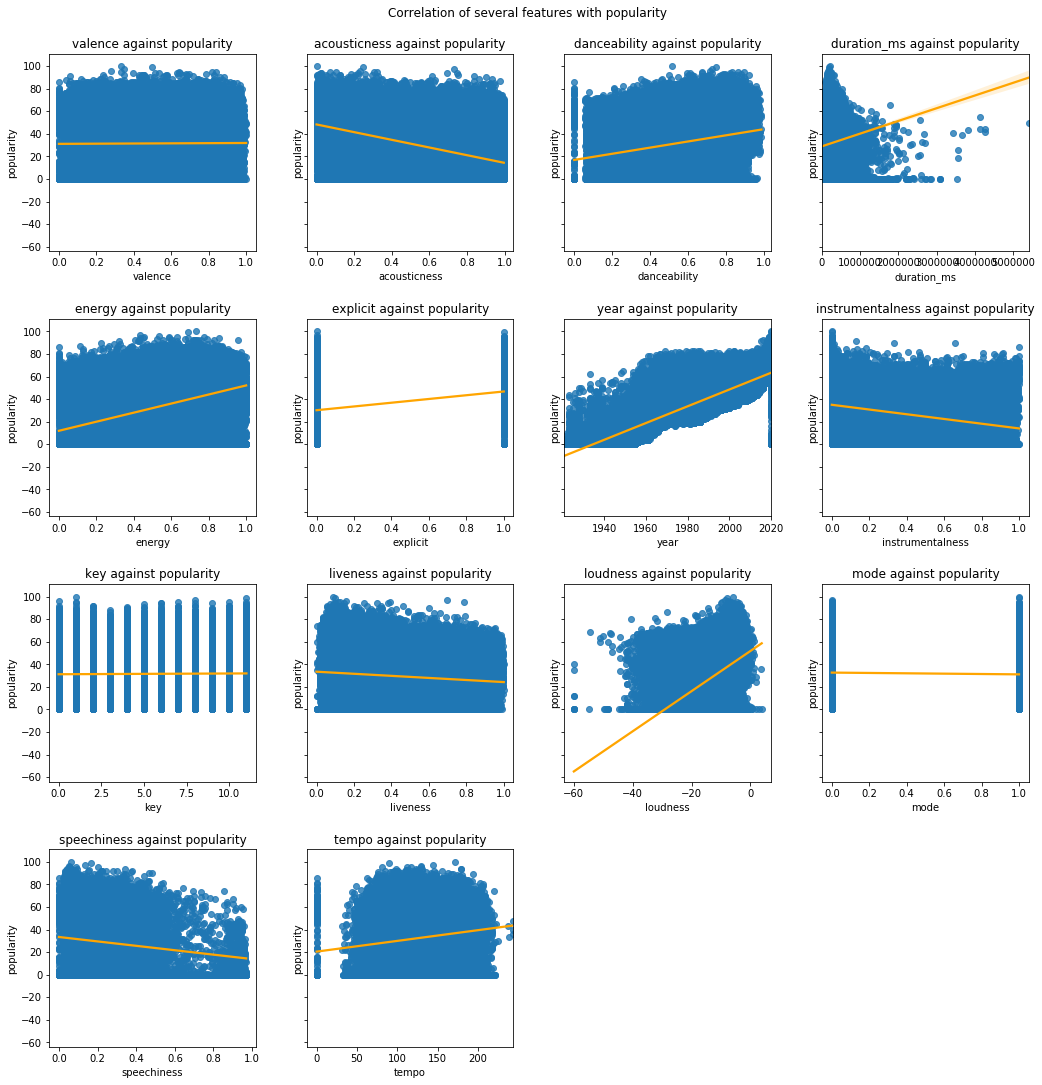

In [8]:
#create a 4 by 4 grid of subplots
fig, axs = plt.subplots(4, 4, sharey=True, figsize=(15,15))
fig.suptitle('Correlation of several features with popularity', y=1.01)
 
#I only need 14 subplots (there are 14 features), might as well remove the last three subplots
fig.delaxes(axs[3][2])
fig.delaxes(axs[3][3])
 
#I need to be able to loop through each subplot, so I make a 1-d array I can loop through easily. 
#I also exclude the deleted axes
loopable_axs = axs.reshape(-1)[:-2]
 
for n in range(len(loopable_axs)):
  loopable_axs[n].set_title(f'{features[n]} against popularity')
  sns.regplot(ax=loopable_axs[n], x=features[n], y='popularity', data=data, line_kws={'color':'orange'})
 
fig.tight_layout(pad=2.0)